In [24]:
import numpy as np
import scipy
import matplotlib
import thinkstats2
import thinkplot
%matplotlib inline


import pandas as pd

In [25]:
#Read the data from csv file
playeras_data = pd.read_csv("C:\Users\mehmetergun\Desktop\BasketballDB-20130121\\basketball_player_allstar.csv")
player_data = pd.read_csv("C:\Users\mehmetergun\Desktop\BasketballDB-20130121\\basketball_players.csv")
team_data = pd.read_csv("C:\Users\mehmetergun\Desktop\BasketballDB-20130121\\basketball_teams.csv")
abbv_data = pd.read_csv("C:\Users\mehmetergun\Desktop\BasketballDB-20130121\\basketball_abbrev.csv")
draft_data = pd.read_csv("C:\Users\mehmetergun\Desktop\BasketballDB-20130121\\basketball_draft.csv")

In [26]:
player_data.columns

Index([u'playerID', u'year', u'stint', u'tmID', u'lgID', u'GP', u'GS',
       u'minutes', u'points', u'oRebounds', u'dRebounds', u'rebounds',
       u'assists', u'steals', u'blocks', u'turnovers', u'PF', u'fgAttempted',
       u'fgMade', u'ftAttempted', u'ftMade', u'threeAttempted', u'threeMade',
       u'PostGP', u'PostGS', u'PostMinutes', u'PostPoints', u'PostoRebounds',
       u'PostdRebounds', u'PostRebounds', u'PostAssists', u'PostSteals',
       u'PostBlocks', u'PostTurnovers', u'PostPF', u'PostfgAttempted',
       u'PostfgMade', u'PostftAttempted', u'PostftMade', u'PostthreeAttempted',
       u'PostthreeMade', u'note'],
      dtype='object')

In [27]:
#How mean of points varies between divisions
team_data.groupby(["divID"])["o_pts"].mean()

divID
AT    8214.824034
CD    8162.931559
EA    2597.851064
ED    7878.031250
MW    8426.731343
NO     364.875000
NW    7958.450000
PC    8499.500000
SE    7785.850000
SO     339.750000
SW    7831.575000
WD    7881.212500
WE    2482.760870
Name: o_pts, dtype: float64

In [53]:
#Filter the player data and create another dataframe from columns that will be used in analysis.
hypothesis_data = player_data.filter(["playerID", "minutes","points"])
hypothesis_data = hypothesis_data[hypothesis_data["minutes"] != 0] #Delete rows that has 0 in minutes
hypothesis_data.dropna() #Drop NaN values.
hypothesis_data.head(5)

,playerID,minutes,points
943,arizipa01,2939,1674
944,barkecl01,494,126
945,barksdo01,2014,781
946,barnhle01,2344,820
947,behnkel01,55,16


In [41]:
#Print the descriptive statistics
print "Mean of scores %d" % hypothesis_data.points.mean()
print "Median of scores:%d" % hypothesis_data.points.median()
print "Standard deviation of scores: %d" % hypothesis_data.points.std()
print "Maximum of scores: %d" % hypothesis_data.points.max()
print "Minumum of scores: %d" % hypothesis_data.points.min()

Mean of scores 534
Median of scores:386
Standard deviation of scores: 513
Maximum of scores: 4029
Minumum of scores: 0


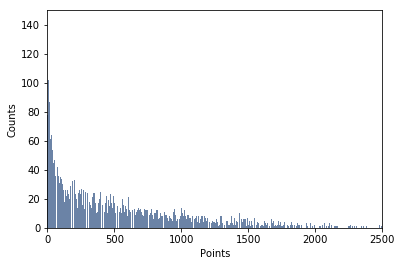

In [31]:
#Create histogram and plot it using thinkplot module.
hist = thinkstats2.Hist(hypothesis_data.points)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Points',
ylabel='Counts',
axis = [0,2500,0,150])


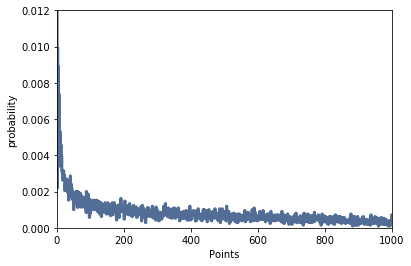

In [43]:
#Create pmf and plot it using thinkplot module.
pmf = thinkstats2.Pmf(hypothesis_data.points)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Points',
ylabel='probability',
axis = [0,1000,0,0.012])

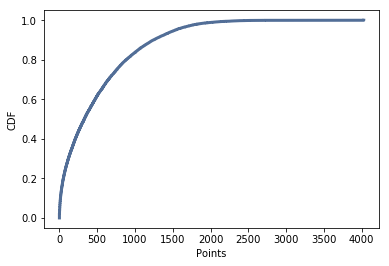

In [33]:
#Create cdf and plot it using thinkplot molude.
cdf = thinkstats2.Cdf(hypothesis_data.points)
thinkplot.Cdf(cdf)

thinkplot.Config(xlabel = 'Points',ylabel = 'CDF')

In [46]:
cdf[1000] #Cdf of 1000

0.83710159572228537

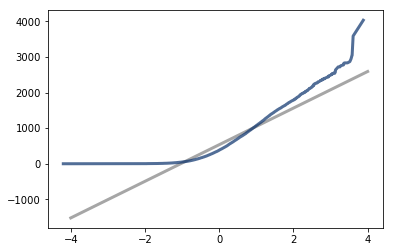

In [55]:
#Function is taken from thinkstats to model the distribution of points.
def MakeNormalPlot(column):
    mean = column.mean()
    std = column.std()
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(column)
    thinkplot.Plot(xs, ys)

#Create model of distribution of models
MakeNormalPlot(hypothesis_data.points)

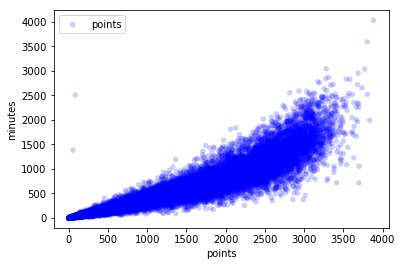

In [35]:
#Scatter plot to visualize the correlation between minutes and scores.
thinkplot.Scatter(hypothesis_data.minutes, hypothesis_data.points)
thinkplot.Show(xlabel="points",
ylabel="minutes")

In [36]:
#Calculate the Pearson's correaltions using scipy module
correlation_coefficient,_ = scipy.stats.pearsonr(hypothesis_data.minutes, hypothesis_data.points)
print correlation_coefficient

0.92669007073


In [54]:
#Craate a hypothesis test to test the correlation 
class pointtest(thinkstats2.HypothesisTest):
    
    #Pearson's correlation is used as test statistic
    def TestStatistic(self,data):
        xy,xs = data
        test_stats = abs(scipy.stats.pearsonr(xy,xs)[0])
        return test_stats
    
    #Create random model by shuffling points
    def RunModel(self):
        xy,xs = self.data
        xs = np.random.permutation(xs)
        return xy,xs


data = hypothesis_data.minutes, hypothesis_data.points
ht = pointtest(data)
#Print the p-value and R squarred.
print ht.PValue()
print correlation_coefficient**2

0.0
0.85875448719
